In [1]:
import os
import pandas as pd
import re

In [7]:
dir_ = '/Users/petern/Desktop/Python/Data_Analyst_Test/Citigo/' #Tên folder
directory = os.listdir(dir_)

In [19]:
f_sales = pd.read_excel('/Users/petern/Desktop/Python/Data_Analyst_Test/Citigo/f_sales.xlsx')
d_product = pd.read_excel('/Users/petern/Desktop/Python/Data_Analyst_Test/Citigo/d_product.xlsx')
d_sales_territory = pd.read_excel('/Users/petern/Desktop/Python/Data_Analyst_Test/Citigo/d_sales_territory.xlsx')
d_product_subcategory = pd.read_excel('/Users/petern/Desktop/Python/Data_Analyst_Test/Citigo/d_product_subcategory.xlsx')
d_customer = pd.read_excel('/Users/petern/Desktop/Data_Analyst_Test/Python/Citigo/d_customer.xlsx')

In [18]:
f_sales.head()

,ProductKey,OrderDateKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,SalesAmount,OrderDate
0,528,20130128,14870,4,SO51900,1,1,4.99,1.8663,0.3992,5,2013-01-28
1,528,20130129,15319,4,SO51948,1,1,4.99,1.8663,0.3992,5,2013-01-29
2,528,20130131,16384,4,SO52043,1,1,4.99,1.8663,0.3992,5,2013-01-31
3,528,20130131,15476,4,SO52045,1,1,4.99,1.8663,0.3992,5,2013-01-31
4,528,20130201,15861,4,SO52094,1,1,4.99,1.8663,0.3992,5,2013-02-01


# Note: Q1 is Question_1: Which Key Metrics to be included in your Report? Please shortly explain your choices for each Metrics.

# Note: Q2 is Question_2: Visualizations

# Note: Q3 is Question_3: Based on your Report (and all data you have), your Manager requests you to make recommendations on how to improve revenue and profit in 2014 and 2015. What will you recommend, and Why? 

In [168]:
f_sales['SalesOrderLineNumber'].hist()
f_sales['SalesOrderLineNumber'].value_counts()

1    27659
2    17991
3     9828
4     3958
5      820
6      124
7       15
8        3
Name: SalesOrderLineNumber, dtype: int64

count    60398.000000
mean       286.065657
std        552.457641
min          0.856500
25%          2.973300
50%         11.216300
75%        294.579700
max       2171.294200
Name: TotalProductCost, dtype: float64


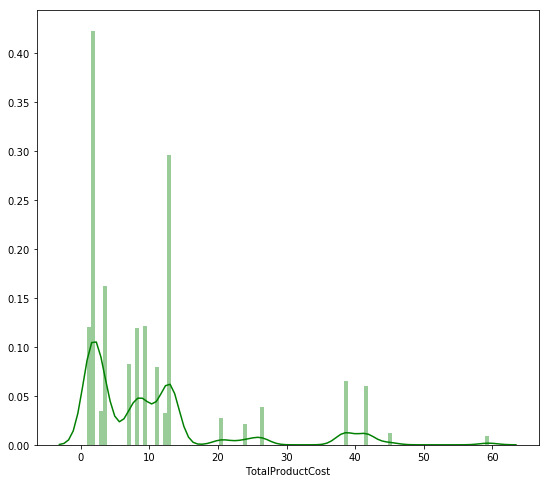

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
print(f_sales['TotalProductCost'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(f_sales[f_sales['TotalProductCost']<100]['TotalProductCost'], color='g', bins=100, hist_kws={'alpha': 0.4})

count    60398.000000
mean       486.037783
std        928.454329
min          2.000000
25%          8.000000
50%         30.000000
75%        540.000000
max       3578.000000
Name: SalesAmount, dtype: float64


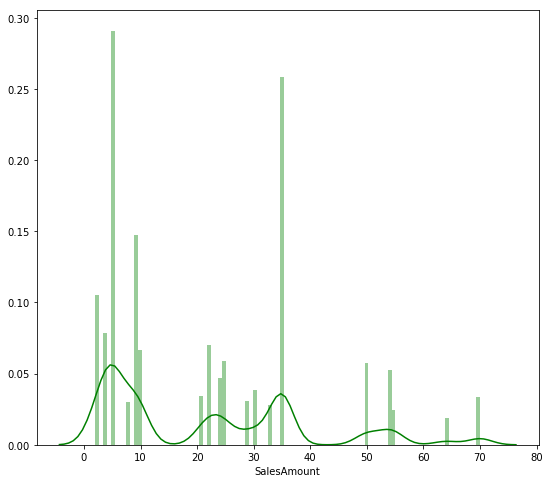

In [127]:
print(f_sales['SalesAmount'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(f_sales[f_sales['SalesAmount']<100]['SalesAmount'], color='g', bins=100, hist_kws={'alpha': 0.4})

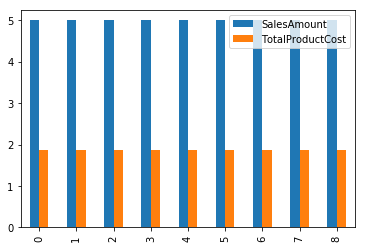

In [170]:
f_sales[f_sales['SalesAmount']<100][['SalesAmount','TotalProductCost']][0:9].plot.bar()

In [177]:
f_sales['Sale_Prodcost'] = (f_sales['SalesAmount']/f_sales['TotalProductCost'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf775e7710>,
      dtype=object)

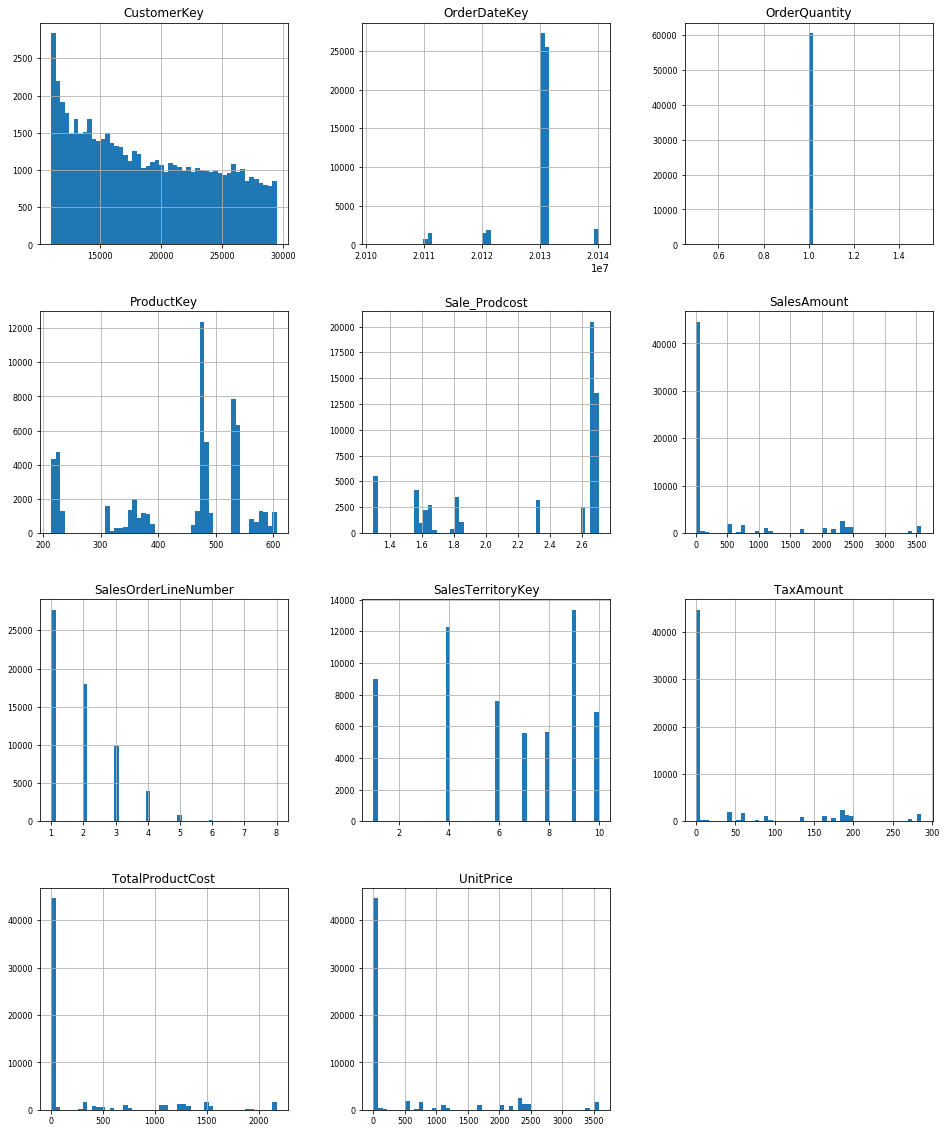

In [178]:
f_sales.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

count    60398.000000
mean       486.037783
std        928.454329
min          2.000000
25%          8.000000
50%         30.000000
75%        540.000000
max       3578.000000
Name: SalesAmount, dtype: float64


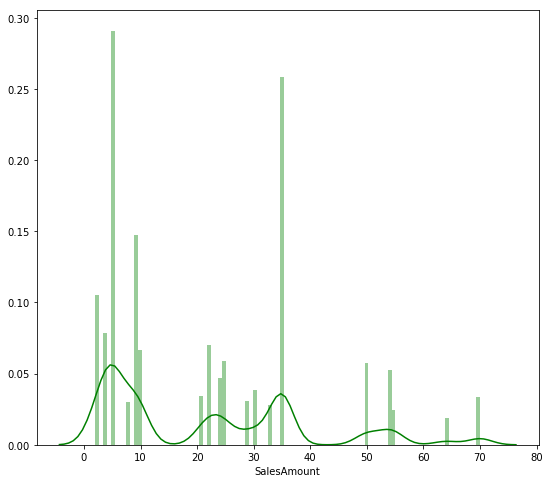

In [86]:
print(f_sales['SalesAmount'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(f_sales[f_sales['SalesAmount']<100]['SalesAmount'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [179]:
f_sales.columns

Index(['ProductKey', 'OrderDateKey', 'CustomerKey', 'SalesTerritoryKey',
       'SalesOrderNumber', 'SalesOrderLineNumber', 'OrderQuantity',
       'UnitPrice', 'TotalProductCost', 'TaxAmount', 'SalesAmount',
       'OrderDate', 'Sale_Prodcost'],
      dtype='object')

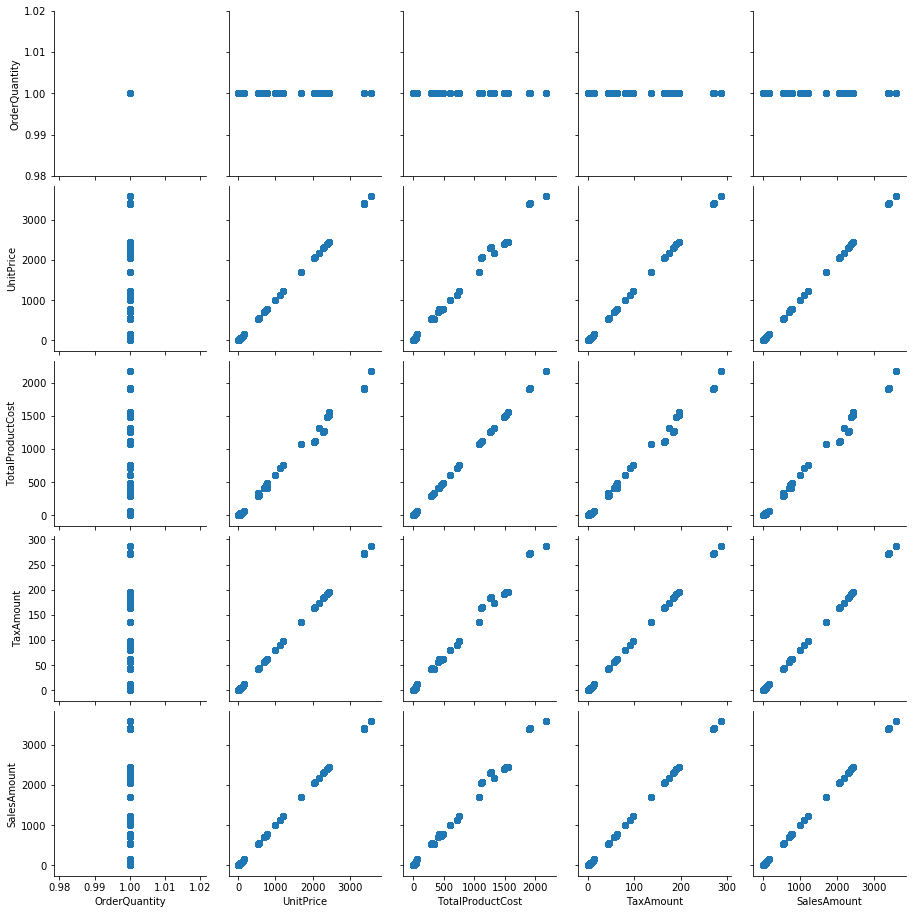

In [188]:
# Then you map to the grid
g = sns.PairGrid(f_sales[['OrderQuantity','UnitPrice','TotalProductCost','TaxAmount','SalesAmount']])
g.map(plt.scatter)

In [20]:
d_product.head()

,ProductKey,ProductSubcategoryKey,ProductName,Color,ListPrice,Size,SizeRange,ProductLine,DealerPrice,Class,Style,ModelName,Status
0,1,NaN,Adjustable Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
1,2,NaN,Bearing Ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
2,12,NaN,Crown Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
3,14,NaN,Decal 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
4,15,NaN,Decal 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current


In [69]:
len(d_product)

606

In [25]:
d_product.columns

Index(['ProductKey', 'ProductSubcategoryKey', 'ProductName', 'Color',
       'ListPrice', 'Size', 'SizeRange', 'ProductLine', 'DealerPrice', 'Class',
       'Style', 'ModelName', 'Status'],
      dtype='object')

In [189]:
df_Prod = d_product[['ProductKey','ProductSubcategoryKey','ProductName']]
df_sale_prod = pd.merge(f_sales, df_Prod, on = 'ProductKey', how='left')
df_sale_prod.head()

,ProductKey,OrderDateKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,SalesAmount,OrderDate,Sale_Prodcost,ProductSubcategoryKey,ProductName
0,528,20130128,14870,4,SO51900,1,1,4.99,1.8663,0.3992,5,2013-01-28,2.679098,37.0,Mountain Tire Tube
1,528,20130129,15319,4,SO51948,1,1,4.99,1.8663,0.3992,5,2013-01-29,2.679098,37.0,Mountain Tire Tube
2,528,20130131,16384,4,SO52043,1,1,4.99,1.8663,0.3992,5,2013-01-31,2.679098,37.0,Mountain Tire Tube
3,528,20130131,15476,4,SO52045,1,1,4.99,1.8663,0.3992,5,2013-01-31,2.679098,37.0,Mountain Tire Tube
4,528,20130201,15861,4,SO52094,1,1,4.99,1.8663,0.3992,5,2013-02-01,2.679098,37.0,Mountain Tire Tube


In [195]:
d_product_subcategory.head()


,ProductSubcategoryKey,ProductSubcategoryName,ProductCategoryKey,Product Category
0,1,Mountain Bikes,1,Bikes
1,2,Road Bikes,1,Bikes
2,3,Touring Bikes,1,Bikes
3,4,Handlebars,2,Components
4,5,Bottom Brackets,2,Components


In [190]:
df_prodsub_sale = pd.merge(df_sale_prod,d_product_subcategory, on = 'ProductSubcategoryKey', how='left')
df_prodsub_sale.head()

,ProductKey,OrderDateKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,SalesAmount,OrderDate,Sale_Prodcost,ProductSubcategoryKey,ProductName,ProductSubcategoryName,ProductCategoryKey,Product Category
0,528,20130128,14870,4,SO51900,1,1,4.99,1.8663,0.3992,5,2013-01-28,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories
1,528,20130129,15319,4,SO51948,1,1,4.99,1.8663,0.3992,5,2013-01-29,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories
2,528,20130131,16384,4,SO52043,1,1,4.99,1.8663,0.3992,5,2013-01-31,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories
3,528,20130131,15476,4,SO52045,1,1,4.99,1.8663,0.3992,5,2013-01-31,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories
4,528,20130201,15861,4,SO52094,1,1,4.99,1.8663,0.3992,5,2013-02-01,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories


In [196]:
d_sales_territory.head()

,SalesTerritoryKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


In [191]:
df_prodsub_sale_teri = pd.merge(df_prodsub_sale,d_sales_territory, on = 'SalesTerritoryKey', how='left')
df_prodsub_sale_teri.head()

,ProductKey,OrderDateKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,...,OrderDate,Sale_Prodcost,ProductSubcategoryKey,ProductName,ProductSubcategoryName,ProductCategoryKey,Product Category,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup
0,528,20130128,14870,4,SO51900,1,1,4.99,1.8663,0.3992,...,2013-01-28,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories,Southwest,United States,North America
1,528,20130129,15319,4,SO51948,1,1,4.99,1.8663,0.3992,...,2013-01-29,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories,Southwest,United States,North America
2,528,20130131,16384,4,SO52043,1,1,4.99,1.8663,0.3992,...,2013-01-31,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories,Southwest,United States,North America
3,528,20130131,15476,4,SO52045,1,1,4.99,1.8663,0.3992,...,2013-01-31,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories,Southwest,United States,North America
4,528,20130201,15861,4,SO52094,1,1,4.99,1.8663,0.3992,...,2013-02-01,2.679098,37.0,Mountain Tire Tube,Tires and Tubes,4,Accessories,Southwest,United States,North America


In [ ]:
d_customer.head()

In [197]:
df_prodsub_sale_teri_cust = pd.merge(df_prodsub_sale_teri,d_customer, on = 'CustomerKey', how='left')
df_prodsub_sale_teri.head()

,ProductKey,OrderDateKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,...,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,NumberCarsOwned,DateFirstPurchase,CommuteDistance,BirthYear,FirstPurchaseYear
0,528,20130128,14870,4,SO51900,1,1,4.99,1.8663,0.3992,...,"£40,000",3,3,Partial College,Clerical,2,"Monday, January 28, 2013",0-1 Miles,1979,2013
1,528,20130129,15319,4,SO51948,1,1,4.99,1.8663,0.3992,...,"£70,000",4,1,Bachelors,Management,1,"Tuesday, January 29, 2013",1-2 Miles,1952,2013
2,528,20130131,16384,4,SO52043,1,1,4.99,1.8663,0.3992,...,"£60,000",4,0,Graduate Degree,Skilled Manual,0,"Thursday, January 31, 2013",0-1 Miles,1964,2013
3,528,20130131,15476,4,SO52045,1,1,4.99,1.8663,0.3992,...,"£60,000",1,0,Graduate Degree,Professional,0,"Thursday, January 31, 2013",2-5 Miles,1975,2013
4,528,20130201,15861,4,SO52094,1,1,4.99,1.8663,0.3992,...,"£40,000",4,4,Partial College,Clerical,2,"Friday, February 1, 2013",0-1 Miles,1977,2013


In [198]:
df_prodsub_sale_teri_cust.columns

Index(['ProductKey', 'OrderDateKey', 'CustomerKey', 'SalesTerritoryKey',
       'SalesOrderNumber', 'SalesOrderLineNumber', 'OrderQuantity',
       'UnitPrice', 'TotalProductCost', 'TaxAmount', 'SalesAmount',
       'OrderDate', 'Sale_Prodcost', 'ProductSubcategoryKey', 'ProductName',
       'ProductSubcategoryName', 'ProductCategoryKey', 'Product Category',
       'SalesTerritoryRegion', 'SalesTerritoryCountry', 'SalesTerritoryGroup',
       'GeographyKey', 'CustomerAlternateKey', 'FirstName', 'LastName',
       'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'Education', 'Occupation', 'NumberCarsOwned',
       'DateFirstPurchase', 'CommuteDistance', 'BirthYear',
       'FirstPurchaseYear'],
      dtype='object')

In [240]:
df_prodsub_sale_teri_cust['OrderDateKey']=pd.to_datetime(df_prodsub_sale_teri_cust['OrderDateKey'], format='%Y%m%d')

In [244]:
df_prodsub_sale_teri_cust.head()

,ProductKey,OrderDateKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,TaxAmount,...,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,NumberCarsOwned,DateFirstPurchase,CommuteDistance,BirthYear,FirstPurchaseYear
0,528,2013-01-28,14870,4,SO51900,1,1,4.99,1.8663,0.3992,...,"£40,000",3,3,Partial College,Clerical,2,"Monday, January 28, 2013",0-1 Miles,1979,2013
1,528,2013-01-29,15319,4,SO51948,1,1,4.99,1.8663,0.3992,...,"£70,000",4,1,Bachelors,Management,1,"Tuesday, January 29, 2013",1-2 Miles,1952,2013
2,528,2013-01-31,16384,4,SO52043,1,1,4.99,1.8663,0.3992,...,"£60,000",4,0,Graduate Degree,Skilled Manual,0,"Thursday, January 31, 2013",0-1 Miles,1964,2013
3,528,2013-01-31,15476,4,SO52045,1,1,4.99,1.8663,0.3992,...,"£60,000",1,0,Graduate Degree,Professional,0,"Thursday, January 31, 2013",2-5 Miles,1975,2013
4,528,2013-02-01,15861,4,SO52094,1,1,4.99,1.8663,0.3992,...,"£40,000",4,4,Partial College,Clerical,2,"Friday, February 1, 2013",0-1 Miles,1977,2013


In [258]:
Cust_Trafic = df_prodsub_sale_teri_cust.groupby(['OrderDateKey','CustomerKey']).size().reset_index(name="Freq")


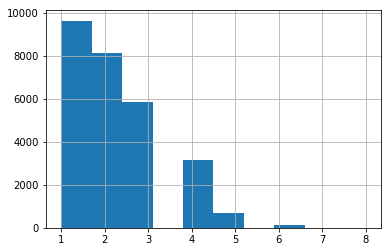

In [257]:
Cust_Trafic.sort_values('Freq',ascending=True)['Freq'].hist()

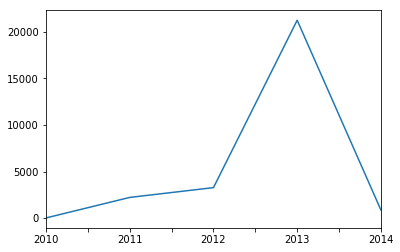

In [261]:
dtime=Cust_Trafic.OrderDateKey.dt.strftime('%Y')
dtime.value_counts().sort_values().sort_index().plot()


# 

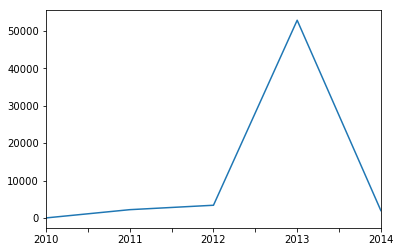

In [237]:
dtime=pd.to_datetime(df_prodsub_sale_teri_cust.OrderDateKey, format='%Y%m%d').dt.strftime('%Y')
dtime.value_counts().sort_values().sort_index().plot()

In [230]:
dtime.value_counts().sort_values(axis=0,ascending=False)

2013    52801
2012     3397
2011     2216
2014     1970
2010       14
Name: OrderDateKey, dtype: int64

2010       14
2011     2216
2012     3397
2013    52801
2014     1970
Name: OrderDateKey, dtype: int64

In [202]:
df_prodsub_sale_teri_cust.OrderDateKey

0        20130128
1        20130129
2        20130131
3        20130131
4        20130201
           ...   
60393    20131213
60394    20131214
60395    20131216
60396    20131225
60397    20131226
Name: OrderDateKey, Length: 60398, dtype: int64

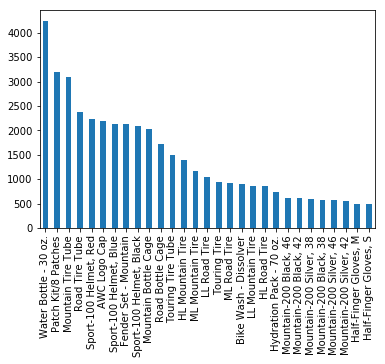

In [199]:
df_prodsub_sale_teri_cust.ProductName.value_counts()[0:29].plot.bar()

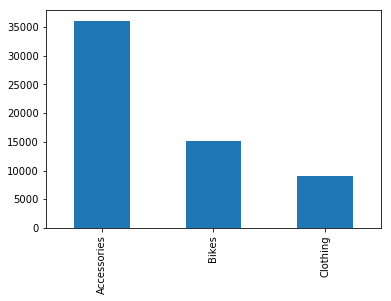

In [200]:
df_prodsub_sale_teri_cust['Product Category'].value_counts()[0:29].plot.bar()

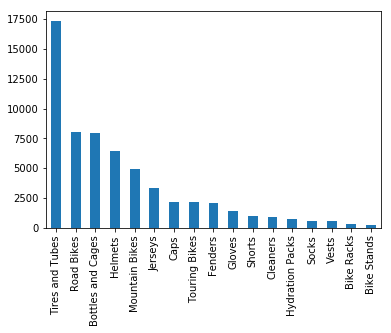

In [194]:
df_prodsub_sale_teri['ProductSubcategoryName'].value_counts()[0:29].plot.bar()

## Most bought products

In [124]:
df = d_product[[column for column in d_product if d_product[column].count() / len(d_product) >= 0.5]]
print("List of dropped columns:", end=" ")
for c in d_product.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')
df.head()

List of dropped columns: Size, SizeRange, Style, 



,ProductKey,ProductSubcategoryKey,ProductName,Color,ListPrice,ProductLine,DealerPrice,Class,ModelName,Status
0,1,NaN,Adjustable Race,NaN,NaN,NaN,NaN,NaN,NaN,Current
1,2,NaN,Bearing Ball,NaN,NaN,NaN,NaN,NaN,NaN,Current
2,12,NaN,Crown Race,NaN,NaN,NaN,NaN,NaN,NaN,Current
3,14,NaN,Decal 1,NaN,NaN,NaN,NaN,NaN,NaN,Current
4,15,NaN,Decal 2,NaN,NaN,NaN,NaN,NaN,NaN,Current


In [165]:
d_customer.describe()

,CustomerKey,GeographyKey,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,BirthYear,FirstPurchaseYear
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,257.956287,1.844352,1.004058,1.502705,1968.823469,2012.610853
std,5336.015523,196.531062,1.612408,1.522660,1.138394,11.536142,0.732673
min,11000.000000,2.000000,0.000000,0.000000,0.000000,1916.000000,2010.000000
25%,15620.750000,62.000000,0.000000,0.000000,1.000000,1961.000000,2012.000000
50%,20241.500000,240.000000,2.000000,0.000000,2.000000,1971.000000,2013.000000
75%,24862.250000,345.000000,3.000000,2.000000,2.000000,1978.000000,2013.000000
max,29483.000000,654.000000,5.000000,5.000000,4.000000,1986.000000,2014.000000


# 1) Tìm DAU


In [41]:
# Copy để xử lý
Customer_new = f_sales.copy()

In [42]:
Customer_Daily = Customer_new.groupby(["OrderDate",'CustomerKey']).size().reset_index(name="Freq")

In [43]:
Customer_Daily

,OrderDate,CustomerKey,Freq
0,2010-12-29,11003,1
1,2010-12-29,14501,1
2,2010-12-29,21768,1
3,2010-12-29,25863,1
4,2010-12-29,28389,1
...,...,...,...
27613,2014-01-28,24704,1
27614,2014-01-28,26564,3
27615,2014-01-28,26832,3
27616,2014-01-28,27686,3


In [44]:
Customer_DAU = Customer_Daily.groupby(["OrderDate"]).size().reset_index(name="Freq")

In [46]:
Customer_DAU.sort_values('Freq',ascending=False)

,OrderDate,Freq
1076,2013-12-12,102
1004,2013-10-01,95
1032,2013-10-29,93
1083,2013-12-19,91
886,2013-06-05,91
...,...,...
329,2011-11-26,1
88,2011-03-29,1
46,2011-02-14,1
232,2011-08-21,1


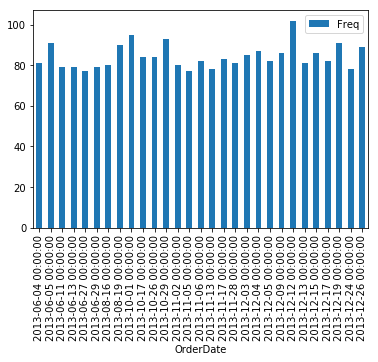

In [55]:
Customer_DAU.sort_values('Freq',ascending=False)[0:29].sort_values('OrderDate').plot.bar("OrderDate")

In [49]:
Customer_DAU.plot.bar("OrderDate")

# 2) Tìm DAU using domain Facebook

In [11]:
Domain_Daily = Customer_new.groupby(["date","domain"]).size().reset_index(name="Freq")

In [12]:
Domain_Daily = Customer_new.groupby(["date",'id',"domain"]).size().reset_index(name="Freq")

In [13]:
Domain_Daily.sort_values('Freq',ascending=False)

,date,id,domain,Freq
51253,2019-03-02,85T2Apqw0R-03pNVvjkHGA..,m.youtube.com,4
11432,2019-02-26,85T2Apqw0R-03pNVvjkHGA..,m.youtube.com,4
27447,2019-02-27,k3TRh__bm2-45JIvlv1Q5A..,coccoc.com,3
38401,2019-02-28,q9pwxhke_WWUIfQO5zETfA..,www.youtube.com,3
8206,2019-02-25,oXemO8UBCPyIGpcQvrRKVA..,www.facebook.com,3
...,...,...,...,...
23304,2019-02-27,KAMBpMYBkSfkXv35Jq6FWA..,m.kenh14.vn,1
23305,2019-02-27,KAMBpMYBkSfkXv35Jq6FWA..,m.youtube.com,1
23306,2019-02-27,KAQ26Iqxjj9x6Z6Q24TWZQ..,coccoc.com,1
23307,2019-02-27,KBTNIZzE0h7RSvkH84GrMQ..,www.facebook.com,1


In [14]:
Face_Daily = Domain_Daily[Domain_Daily.domain.str.contains('facebook')]

In [15]:
Face_Daily .sort_values('Freq',ascending=False)

,date,id,domain,Freq
8206,2019-02-25,oXemO8UBCPyIGpcQvrRKVA..,www.facebook.com,3
59431,2019-03-02,xGSCgwtyAIJLndfkMO32jw..,m.facebook.com,2
61060,2019-03-03,6Qt99PP4WAh8GobWcEbkkg..,www.facebook.com,2
60835,2019-03-03,4yqnrLkjLQJPhHwr-dc8pQ..,www.facebook.com,2
42506,2019-03-01,FefDTGpARZLX_lsidWsE9g..,www.facebook.com,2
...,...,...,...,...
23485,2019-02-27,LK1NXlv3jDuox_2rXjzKMQ..,www.facebook.com,1
23487,2019-02-27,LKntlRkftvx7r_eOD2Psgw..,www.facebook.com,1
23491,2019-02-27,LMIcrz602KSRDSgg00EBJA..,www.facebook.com,1
23493,2019-02-27,LNkZI3CQ1pohUwU8rwYUWg..,www.facebook.com,1


In [16]:
Face_DAU = Face_Daily.groupby(["date"]).size().reset_index(name="Freq")

In [17]:
Face_DAU

,date,Freq
0,2019-02-25,2609
1,2019-02-26,2541
2,2019-02-27,2607
3,2019-02-28,2408
4,2019-03-01,2615
5,2019-03-02,2688
6,2019-03-03,2700


# 3) Traffic Distribution by hours

In [18]:
Customer_new['hour'] = pd.to_datetime(Customer_new['time'])

In [19]:
pd.to_datetime(Customer_new['time'])

0       2020-10-23 12:53:01
1       2020-10-23 11:58:01
2       2020-10-23 14:29:01
3       2020-10-23 20:52:01
4       2020-10-23 00:58:01
                ...        
69995   2020-10-23 17:56:01
69996   2020-10-23 19:40:01
69997   2020-10-23 12:04:01
69998   2020-10-23 00:54:01
69999   2020-10-23 21:44:02
Name: time, Length: 70000, dtype: datetime64[ns]

In [20]:
Customer_new

,date,time,id,domain,DateTime,hour
0,2019-02-25,12:53:01,a37agOUtUEQiyagcdU2TAA..,youtube.com,2019-02-25 12:53:01,2020-10-23 12:53:01
1,2019-02-25,11:58:01,5wGdzKx3Kf4WK0gNfwZPpw..,www.google.com,2019-02-25 11:58:01,2020-10-23 11:58:01
2,2019-02-25,14:29:01,ZoVXA0kss3EZXHWxv96EXA..,trangtraiviet.vn,2019-02-25 14:29:01,2020-10-23 14:29:01
3,2019-02-25,20:52:01,SE5aS0u9gRYDV76kCwilXQ..,vn.yahoo.com,2019-02-25 20:52:01,2020-10-23 20:52:01
4,2019-02-25,00:58:01,EGYc8cXe6GVDH3qp-qnPSQ..,www.youtube.com,2019-02-25 00:58:01,2020-10-23 00:58:01
...,...,...,...,...,...,...
69995,2019-03-03,17:56:01,ep7D0dpRFjKYLV8WNv4qhA..,www.google.com,2019-03-03 17:56:01,2020-10-23 17:56:01
69996,2019-03-03,19:40:01,YczVvu-ZARiSFPMCpY4R2g..,www.googleadservices.com,2019-03-03 19:40:01,2020-10-23 19:40:01
69997,2019-03-03,12:04:01,tmmVRJwUubpbs649mEVuLA..,www.youtube.com,2019-03-03 12:04:01,2020-10-23 12:04:01
69998,2019-03-03,00:54:01,3T3iWxyAllzLH1Tu-ezJUg..,www.facebook.com,2019-03-03 00:54:01,2020-10-23 00:54:01


In [21]:
Customer_new['hour'] = Customer_new['DateTime'].dt.hour

In [22]:
Hour_Trafic = Customer_new.groupby(['hour']).size().reset_index(name="Traffic")

In [23]:
Hour_Trafic.sort_values('Traffic', ascending=False)

,hour,Traffic
20,20,5514
21,21,5128
15,15,4613
14,14,4446
19,19,4349
10,10,4313
16,16,4183
9,9,4095
11,11,4038
22,22,3775


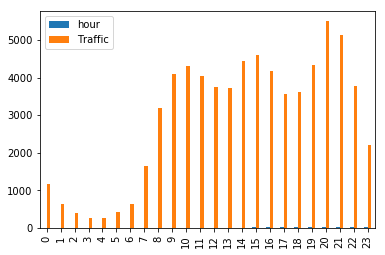

In [30]:
Hour_Trafic.plot.bar()

# 4) Top 10 domains by traffic.

In [26]:
Domain_Trafic = Customer_new.groupby(['domain']).size().reset_index(name="Traffic")

In [27]:
Domain_Trafic.sort_values('Traffic', ascending=False)[0:9]

,domain,Traffic
5321,www.facebook.com,17403
6153,www.youtube.com,13648
959,coccoc.com,6177
5394,www.google.com,3657
2663,mail.google.com,2250
5399,www.google.com.vn,1516
4423,translate.google.com,1074
299,accounts.google.com,776
4424,translate.google.com.vn,773


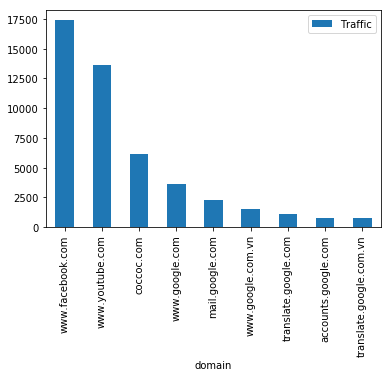

In [34]:
Domain_Trafic.sort_values('Traffic', ascending=False)[0:9].plot.bar("domain")